# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [38]:
import pandas as pd
df = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")

### Print the data
- First 5 rows only

In [39]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [40]:
df=df.set_index('Date')
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [41]:
df.shape

(3650, 1)

## Question 2

### Check the total count of null values in the data

In [42]:
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(3650, 1)

## Question 3

### Describe your dataframe
- use describe() method

In [45]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

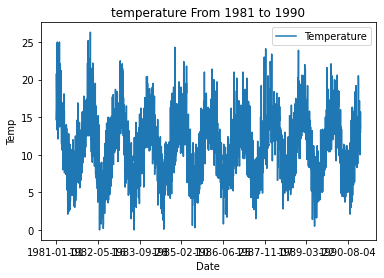

In [46]:
import matplotlib.pyplot as plt
df.plot()
plt.ylabel('Temp')
plt.title('temperature From 1981 to 1990')
plt.show()

### Get representation of the distribution of data using histogram
- use hist() method

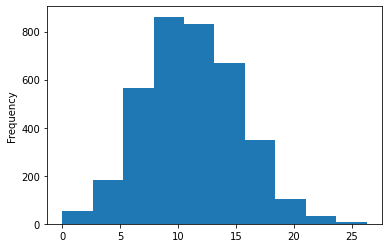

In [47]:
df['Temperature'].plot.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [48]:
df.min()

Temperature    0.0
dtype: float64

In [49]:
df.max()

Temperature    26.3
dtype: float64

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [50]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [51]:
train.shape,test.shape

((2555, 1), (1095, 1))

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [52]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))
train=ms.fit_transform(train)

In [53]:
test=ms.transform(test)

### Print scaled train and test data
- print only first 5 values

In [54]:
train[0:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [55]:
test[0:5]

array([[0.58174905],
       [0.54372624],
       [0.51330798],
       [0.57034221],
       [0.51711027]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [56]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [57]:
X_train,y_train = create_seq_data(train)
X_train,y_train

(array([[0.78707224],
        [0.68060837],
        [0.7148289 ],
        ...,
        [0.53992395],
        [0.54372624],
        [0.50570342]]),
 array([0.68060837, 0.7148289 , 0.55513308, ..., 0.54372624, 0.50570342,
        0.63498099]))

In [60]:
X_train.shape,y_train.shape

((2554, 1), (2554,))

In [63]:
X_test,y_test = create_seq_data(test)
X_test,y_test

(array([[0.58174905],
        [0.54372624],
        [0.51330798],
        ...,
        [0.51711027],
        [0.51330798],
        [0.59695817]]),
 array([0.54372624, 0.51330798, 0.57034221, ..., 0.51330798, 0.59695817,
        0.49429658]))

In [64]:
X_test.shape,y_test.shape

((1094, 1), (1094,))

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [67]:
import numpy as np 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

### Print shape of data
- print shape of X_train and X_test

In [68]:
X_train.shape,X_test.shape

((2554, 1, 1), (1094, 1, 1))

## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(10,stateful=True,batch_input_shape=(1,1,1)))  #lookback=1 at 2nd place
model.add(Dense(1))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [71]:
model.compile(optimizer='adam',loss='mean_squared_error')

### summarize your model
- use summary() method

In [72]:
model.summary()
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   480       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [73]:
model.fit(X_train,y_train,batch_size = 1,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
2554/2554 [==============================] - 4s 2ms/step - loss: 0.0154 - val_loss: 0.0089
Epoch 2/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 3/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 4/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 5/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.0103 - val_loss: 0.0086
Epoch 6/50
2554/2554 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0086
Epoch 7/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.0103 - val_loss: 0.0086
Epoch 8/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.0102 - val_loss: 0.0090
Epoch 9/50
2554/2554 [==============================] - 4s 2ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 10/50
2554/2554 [==============================] - 4s 1ms/step - loss: 0.010

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [78]:
train_pred = model.predict(X_train,batch_size=1)
ms.inverse_transform(y_train_predict[:5])

array([[17.905886],
       [16.24232 ],
       [16.909609],
       [13.850146],
       [14.58614 ]], dtype=float32)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [79]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [80]:
test_pred = model.predict(X_test,batch_size=1)
test_pred[:10]

array([[0.506244  ],
       [0.50899786],
       [0.48857424],
       [0.52819157],
       [0.48602557],
       [0.5316341 ],
       [0.58182144],
       [0.63012415],
       [0.57571876],
       [0.59894633]], dtype=float32)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [81]:
train_pred = ms.inverse_transform(train_pred)
y_train = ms.inverse_transform([y_train])

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [82]:
test_pred = ms.inverse_transform(test_pred)
y_test = ms.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [84]:
import math
from sklearn.metrics import mean_squared_error
train_score=math.sqrt(mean_squared_error(y_train[0],train_pred[:,0]))

In [85]:
train_score

2.6391411040735098

### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [86]:
test_score=math.sqrt(mean_squared_error(y_test[0],test_pred[:,0]))

In [87]:
test_score

2.4830222723199853